# Sampling

## Theta

In [1]:
from configs.vp.nc_ddpmpp import get_config
config = get_config()
config.training.batch_size //= 4

In [2]:
from utils import save_checkpoint, load_checkpoint, restore_checkpoint
from models import utils as mutils
from run_lib import _sample_fn

2024-07-04 18:58:52.438015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
ckptdir = 'workdir/nc-theta/checkpoints/checkpoint_1.pth'

In [4]:
score_model = mutils.create_model(config)
score_model = load_checkpoint(ckptdir, score_model, config.device)

print(f"begin: {config.data.category} - {config.data.image_size}")
sample, n = _sample_fn(config, score_model)

begin: Theta - 64


In [5]:
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt
import numpy as np

In [6]:
nrow = int(np.sqrt(sample.shape[0]))
image_grid = make_grid(sample, nrow, padding=0)
print(image_grid.shape, image_grid.min(), image_grid.max())

torch.Size([3, 256, 256]) tensor(-7.3769, device='cuda:0') tensor(14.5755, device='cuda:0')


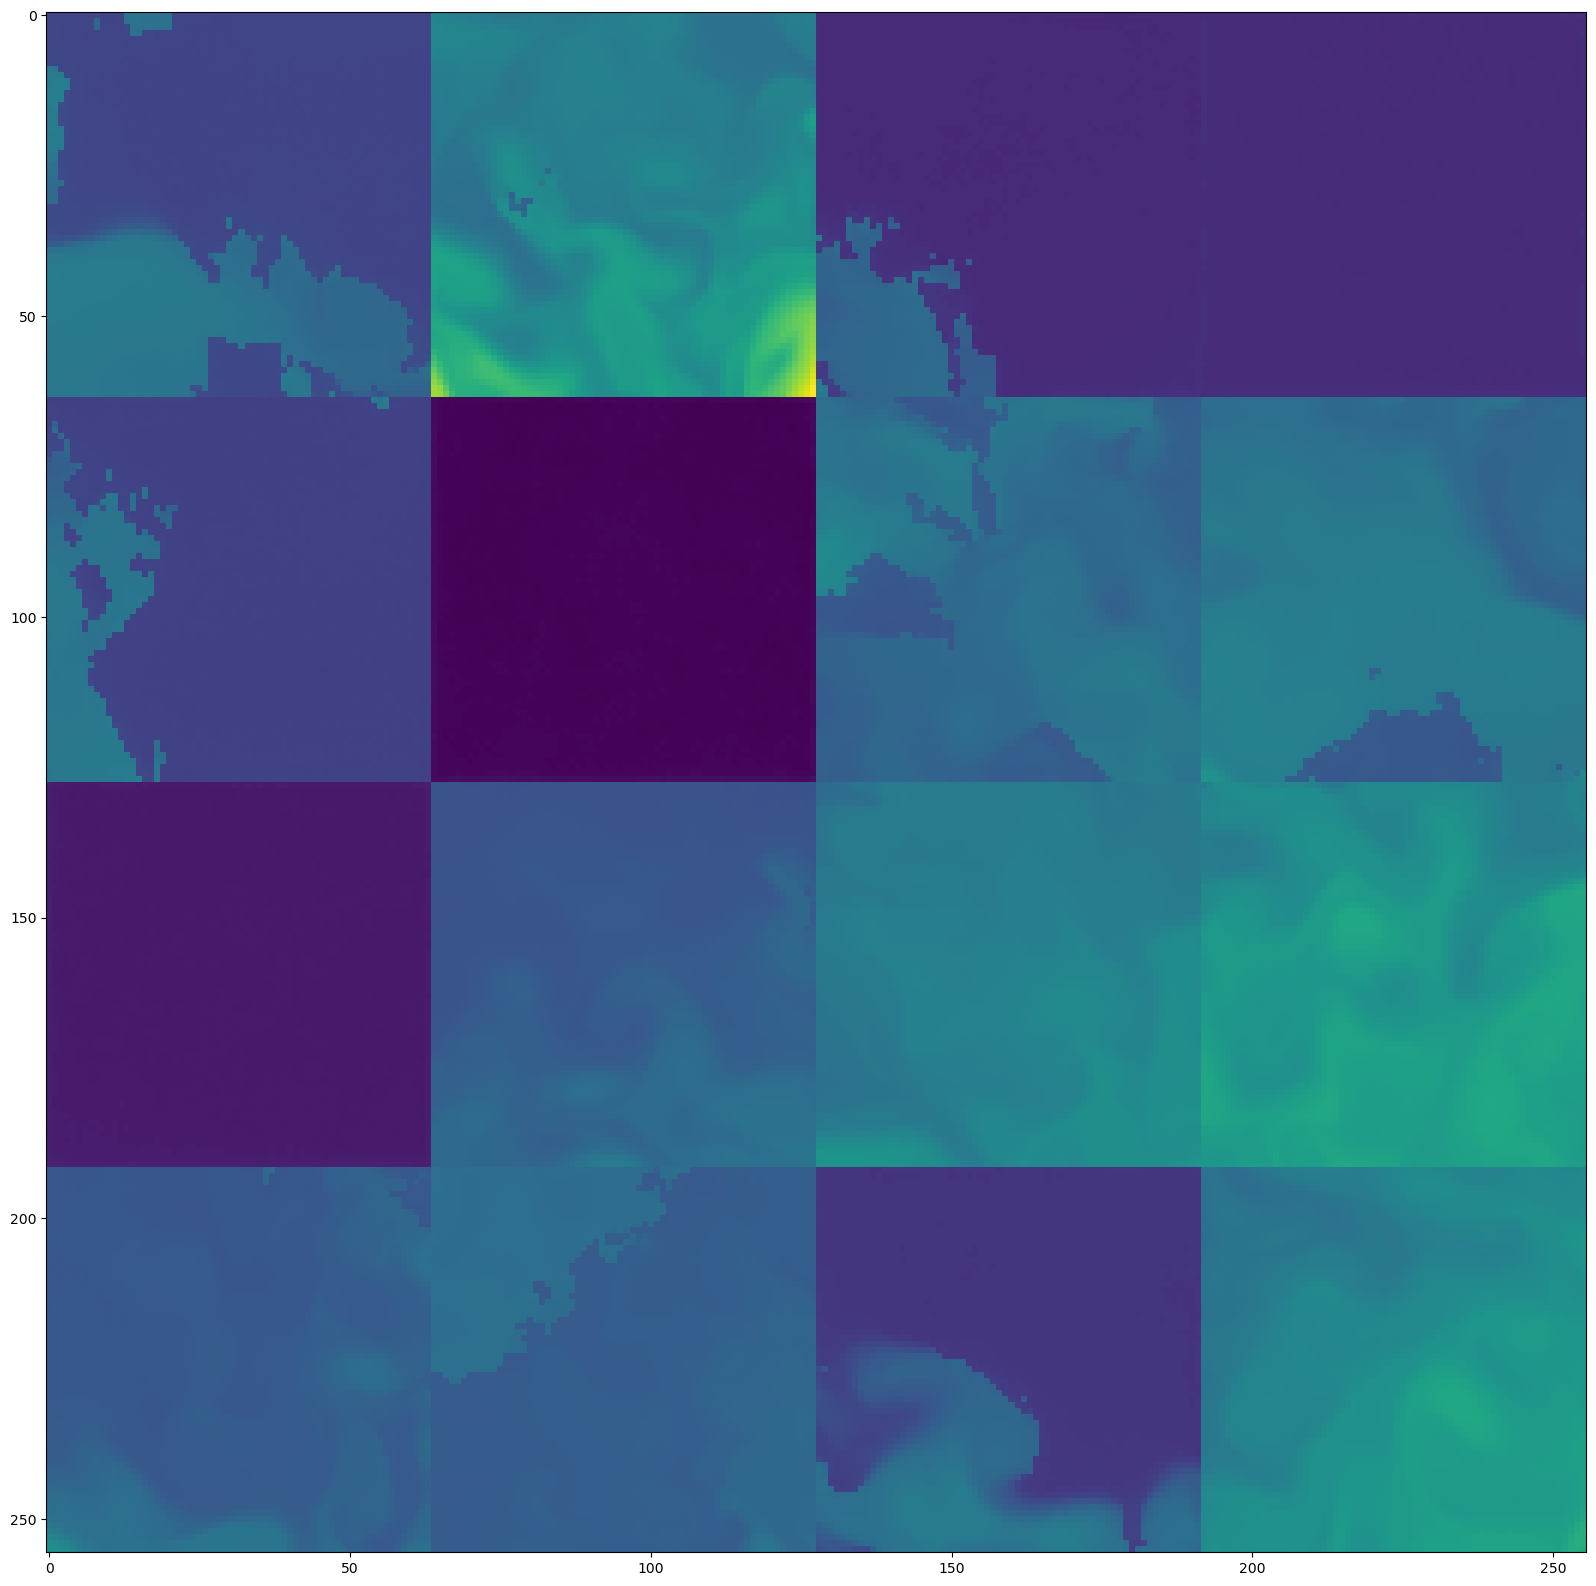

In [7]:
fig, axe = plt.subplots(nrows=1, ncols=1,figsize=(20,20))
axe.imshow(image_grid[0].cpu())

In [8]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

#数据读入
tempe = Dataset('/data1/DATA_PUBLIC/Southern_Ocean/bsose_i122_2013to2017_1day_Theta.nc')
print(tempe.variables.keys())

dict_keys(['iter', 'time', 'XC', 'YC', 'Z', 'Depth', 'rA', 'drF', 'hFacC', 'THETA'])


In [9]:
data = tempe['THETA'][0,0,200:,:]

-1.9468063 26.905975 6.9531326


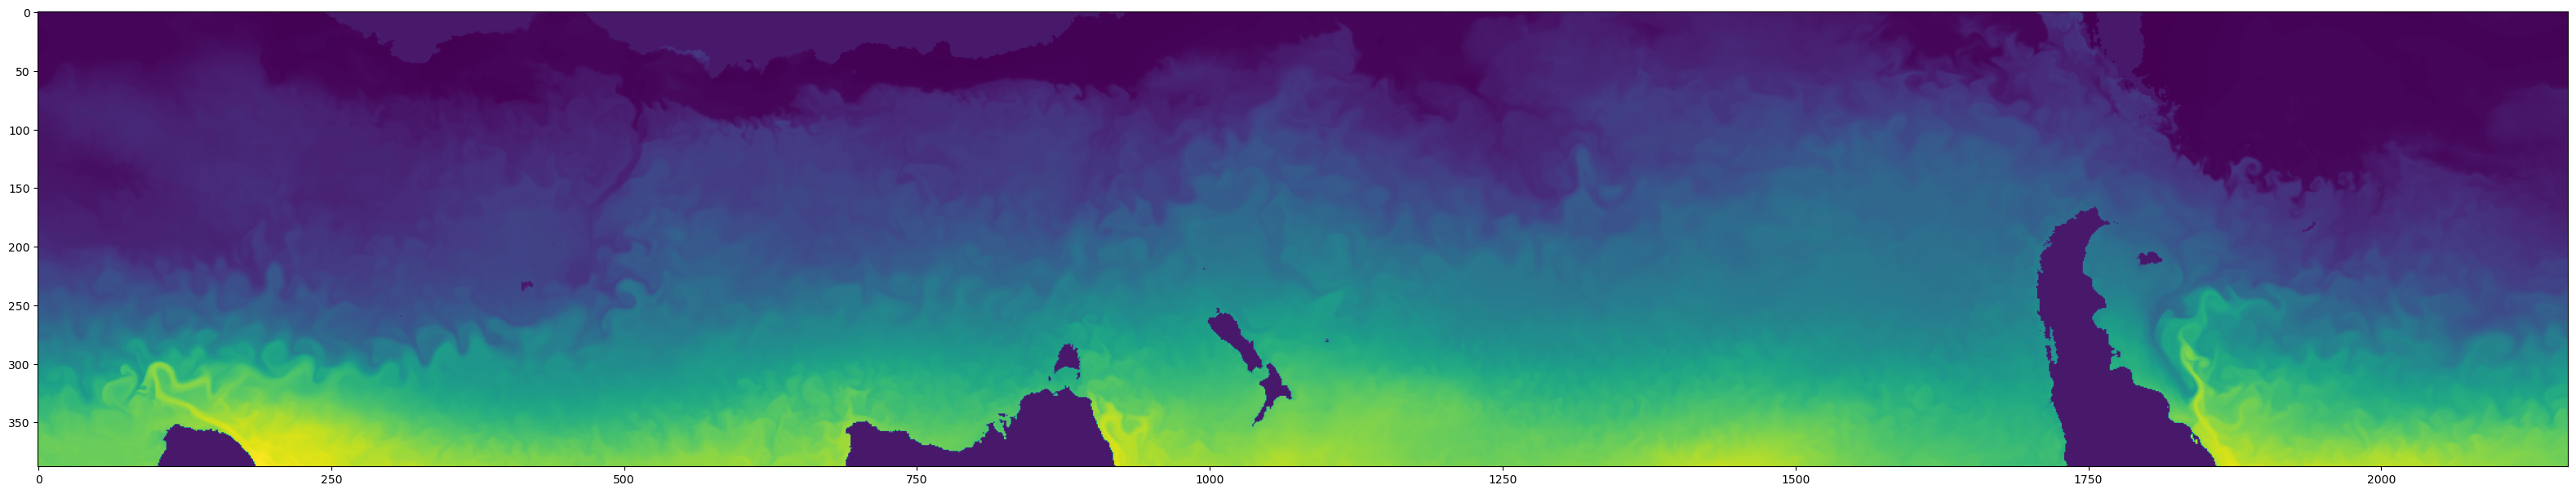

In [10]:
fig, axe = plt.subplots(nrows=1, ncols=1,figsize=(40,20))
axe.imshow(data)
print(data.min(), data.max(), data.mean())

## Chl

In [11]:
from configs.vp.nc_chl_ddpmpp import get_config
config = get_config()

In [12]:
ckptdir = 'workdir/nc-chl/checkpoints/checkpoint_2.pth'
score_model = mutils.create_model(config)
score_model = load_checkpoint(ckptdir, score_model, config.device)

print(f"begin: {config.data.category} - {config.data.image_size}")
sample, n = _sample_fn(config, score_model)

begin: Chl - 64


In [13]:
nrow = int(np.sqrt(sample.shape[0]))
image_grid = make_grid(sample, nrow, padding=0)
print(image_grid.shape, image_grid.min(), image_grid.max())

torch.Size([3, 512, 512]) tensor(-0.4419, device='cuda:0') tensor(4.1544, device='cuda:0')


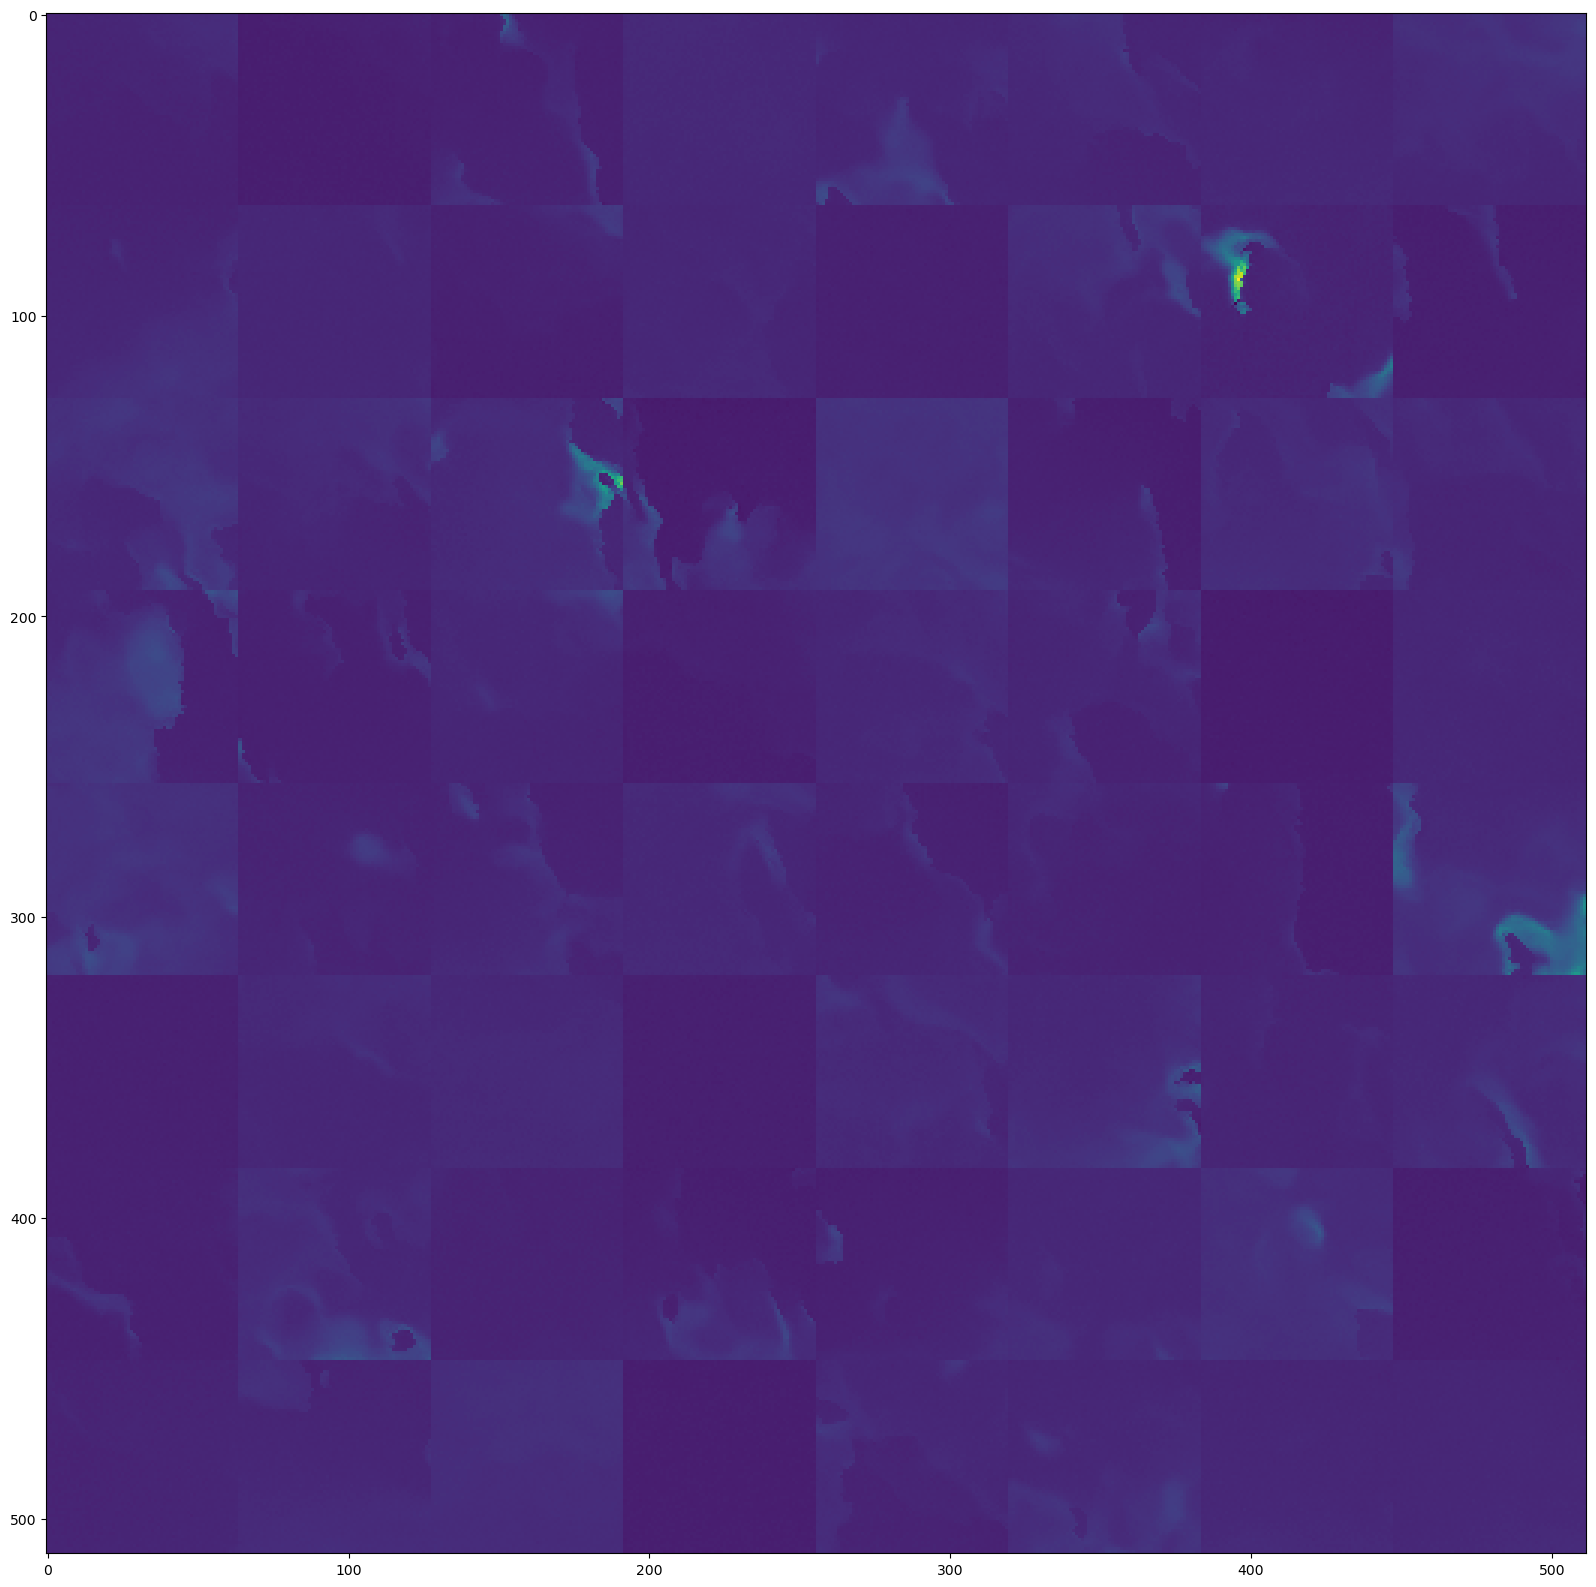

In [14]:
fig, axe = plt.subplots(nrows=1, ncols=1,figsize=(20,20))
axe.imshow(image_grid[0].cpu())

In [15]:
chl = Dataset('/data1/DATA_PUBLIC/Southern_Ocean/bsose_i122_2013to2017_5day_Chl.nc')
print(tempe.variables.keys())

dict_keys(['iter', 'time', 'XC', 'YC', 'Z', 'Depth', 'rA', 'drF', 'hFacC', 'THETA'])


In [16]:
data = chl['BLGCHL'][0,0,200:,:]

0.0 3.1445098 0.15012585


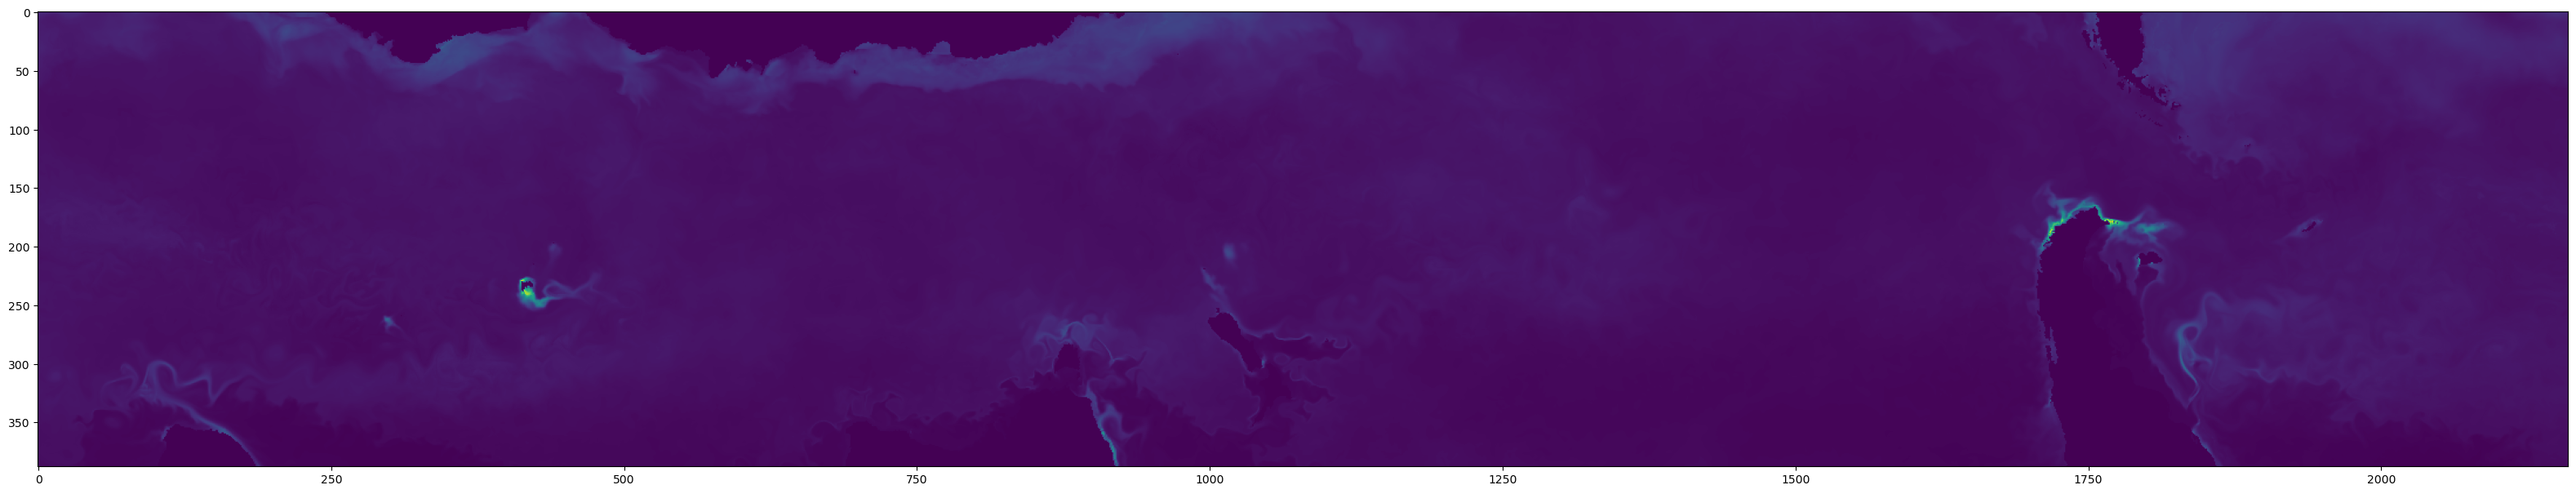

In [17]:
fig, axe = plt.subplots(nrows=1, ncols=1,figsize=(40,20))
axe.imshow(data)
print(data.min(), data.max(), data.mean())